In [33]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import datetime
import math
import random

%matplotlib inline

In [34]:
class Kalman():
    def __init__(self):
        self.x = np.array([[0.], [0.]]) # initial state (location and velocity)
        self.reset()
        
    def reset(self):
        self.P = np.array([[1000., 0.], [0., 1000.]]) # initial uncertainty
        self.u = np.array([[0.], [0.]]) # external motion
        self.F = np.array([[1., 1.], [0, 1.]]) # next state function
        self.H = np.array([[1., 0.]]) # measurement function
        self.R = np.array([[1.]]) # measurement uncertainty
        self.I = np.array([[1., 0.], [0., 1.]]) # identity matrix      
        
    def feed_meas(self, measurement):
        z = np.array([[measurement]]) # z - measurement matrix

        y = z - np.dot(self.H, self.x) # error : previous state - measurement X measurement matrix
        S = np.dot(np.dot(self.H, self.P), self.H.transpose()) + self.R
        K = np.dot(np.dot(self.P, self.H.transpose()), np.linalg.inv(S)) # kalman gain

        self.x = self.x + np.dot(K, y) # new state : x + kalman gain X error
        self.P = np.dot((self.I - np.dot(K, self.H)), self.P) # adjusting uncertainty covariance

    def predict_next_state(self):
        self.x = np.dot(self.F, self.x) + self.u # new state : movement matrix X current state + movement
        self.P = np.dot(np.dot(self.F, self.P), self.F.transpose()) # adjusting covar matrix         
        

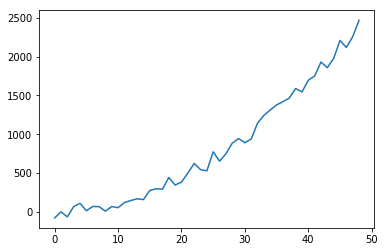

In [44]:
meas_list = [x**2 + (random.random()*200 - 100) for x in range(1,50)]

plt.plot(meas_list)

In [55]:
k = Kalman()
l = []
for i, m in enumerate(meas_list):
    if i % 15 == 0 : 
        k.reset()
        
    l.append(k.x)
    k.feed_meas(m)
    k.predict_next_state()
    

In [56]:
l = np.array(l).reshape(-1,2)

In [57]:
l.shape

(49, 2)

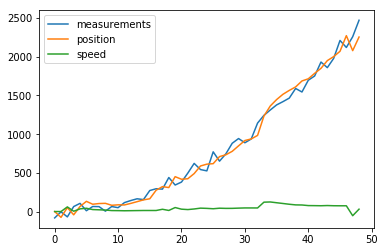

In [58]:
plt.plot(meas_list, label = 'measurements')
plt.plot(l[:,0], label = 'position')
plt.plot(l[:,1], label = 'speed')
plt.legend()

43.930209868170984

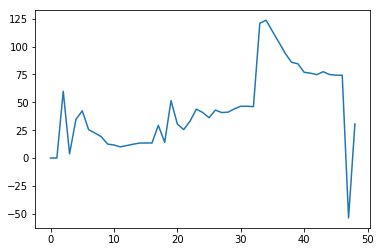

In [59]:
plt.plot(l[:,1], label = 'speed')
l[:,1].mean()

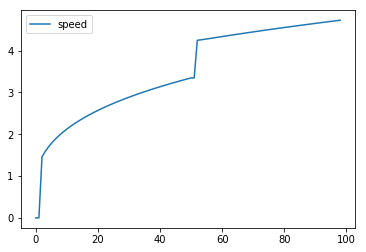

In [259]:
plt.plot(l[:,1], label = 'speed')
plt.legend()